# **import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,RobustScaler,MinMaxScaler,Normalizer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,confusion_matrix,accuracy_score
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import VotingClassifier , VotingRegressor,RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance , plot_tree
from sklearn.neighbors import KNeighborsRegressor

import graphviz

# **데이터로드**


PUBG Finish Placement Prediction

사용자가 몇 등으로 게임을 종료할지를 예측 하는 과제


In [3]:
path ='/content/drive/MyDrive/모델링 프로젝트/'
#testv2 = pd.read_csv(path+'test_V2.csv')
trainv2 = pd.read_csv(path+'train_V2.csv')

# **데이터 구조 파악**

In [ ]:
# trainv2.shape

In [ ]:
# trainv2.info()

In [ ]:
# trainv2.describe()

In [ ]:
 #trainv2.describe(include=["O"])

,Id,groupId,matchId
count,4390578,4390578,4390578
unique,4390578,2005842,46421
top,7f96b2f878858a,b8275198faa03b,d94def2ad4f3c8
freq,1,72,100


In [ ]:
# trainv2.sample(2)

# **전처리**

고정

In [4]:
trainv2[trainv2.isnull().any(axis=1)]
trainv2 =trainv2.drop(index=2744604) #결측치 제거

In [5]:
cond=trainv2.matchType.isin(['squad-fpp','duo-fpp','squad','solo-fpp','duo','solo'])#캐쥬얼,사용자 지정 모드를 제외시킨다

In [6]:
trainv2 = trainv2[cond]

In [7]:
cond2 = trainv2['matchId'].value_counts().loc[trainv2['matchId'].value_counts()>60].index #한게임당 60명 이하 참여한 게임을 제외시킨다
trainv2 = trainv2.loc[trainv2['matchId'].isin(cond2)]

In [8]:
#ordinal encoding
ordi = trainv2[['matchType']]
ordinalencoder = OrdinalEncoder()
raw_ordi = ordinalencoder.fit_transform(ordi)
trainv2["matchtype"]=raw_ordi
trainv2 =trainv2.drop(columns="matchType")

# **전처리**

수정

보류데이터를 제외한 필요데이터만 v3담아 작업한다

In [ ]:
#trainv3 =trainv2.loc[:,['boosts','damageDealt','heals','killPlace','kills','walkDistance','weaponsAcquired','matchType','winPlacePerc']]

In [ ]:
#ordinal encoding
# ordi = trainv3[['matchType']]
# ordinalencoder = OrdinalEncoder()
# raw_ordi = ordinalencoder.fit_transform(ordi)
# trainv3["matchtype"]=raw_ordi
# trainv3 =trainv3.drop(columns="matchType")

In [ ]:
# x=trainv2[feature_names]
# y=trainv2['winPlacePerc']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)
#k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

# **모델학습**
모든 수치형 컬럼을 넣고 모델링

LinearRegression MAE : 0.1138
LGBMRegressor MAE : 0.0898

60명 이하 데이터 drop시 

LinearRegression MAE : 0.1136
LGBMRegressor MAE : 0.0897

LinearRegression StandardScaler MAE : 0.3159
LGBMRegressor StandardScaler MAE : 0.3842

LinearRegression RobustScaler MAE : 1.6347
LGBMRegressor RobustScaler MAE : 0.3323

LinearRegression MinMaxScaler MAE : 0.3340
LGBMRegressor MinMaxScaler MAE : 0.3600

LinearRegression Normalizer MAE : 0.3358
LGBMRegressor Normalizer MAE : 0.3587

0.8343877091375983

In [9]:
feature_names = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPoints','kills','killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills',
                 'swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints']# 모델에 넣을 컬럼만 선택한다     
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)      

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model3 = LinearRegression()
model4 = LGBMRegressor()
model5 = LinearRegression()
model6 = LGBMRegressor()
model7 = LinearRegression()
model8 = LGBMRegressor()
model9 = LinearRegression()
model10 = LGBMRegressor()
SS = StandardScaler()
RS = RobustScaler()
MMS = MinMaxScaler()
NL = Normalizer()

x_train_SS = SS.fit_transform(x_train)
x_test_SS = SS.transform(x_test)
x_train_RS = RS.fit_transform(x_train)
x_test_RS =RS.transform(x_test)
x_train_MMS = MMS.fit_transform(x_train)
x_test_MMS = MMS.transform(x_test)
x_train_NL =NL.fit_transform(x_train)
x_test_NL = NL.transform(x_test)

#model3 = xgb.XGBRegressor(max_depth=3,n_jobs=-1,random_state=42)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train_SS,y_train)
model4.fit(x_train_SS,y_train)
model5.fit(x_train_RS,y_train)
model6.fit(x_train_RS,y_train)
model7.fit(x_train_MMS,y_train)
model8.fit(x_train_MMS,y_train)
model9.fit(x_train_NL,y_train)
model10.fit(x_train_NL,y_train)
#model3.fit(x_train,y_train)

LGBMRegressor()

평가


In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
pred3 = model3.predict(x_train_SS)
pred4 = model4.predict(x_train_SS)
pred5 = model3.predict(x_train_RS)
pred6 = model4.predict(x_train_RS)
pred7 = model3.predict(x_train_MMS)
pred8 = model4.predict(x_train_MMS)
pred9 = model3.predict(x_train_NL)
pred10 = model4.predict(x_train_NL)
#pred3 = model3.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))
print("LinearRegression StandardScaler MAE : %.4f" % mean_absolute_error(y_train,pred3))
print("LGBMRegressor StandardScaler MAE : %.4f" % mean_absolute_error(y_train,pred4))
print("LinearRegression RobustScaler MAE : %.4f" % mean_absolute_error(y_train,pred5))
print("LGBMRegressor RobustScaler MAE : %.4f" % mean_absolute_error(y_train,pred6))
print("LinearRegression MinMaxScaler MAE : %.4f" % mean_absolute_error(y_train,pred7))
print("LGBMRegressor MinMaxScaler MAE : %.4f" % mean_absolute_error(y_train,pred8))
print("LinearRegression Normalizer MAE : %.4f" % mean_absolute_error(y_train,pred9))
print("LGBMRegressor Normalizer MAE : %.4f" % mean_absolute_error(y_train,pred10))
#print("XGBRegressor MAE : %.4f" % mean_absolute_error(y_train,pred3))

LinearRegression MAE : 0.1136
LGBMRegressor MAE : 0.0895
LinearRegression StandardScaler MAE : 0.1136
LGBMRegressor StandardScaler MAE : 0.0894
LinearRegression RobustScaler MAE : 2303.3750
LGBMRegressor RobustScaler MAE : 0.2299
LinearRegression MinMaxScaler MAE : 0.2635
LGBMRegressor MinMaxScaler MAE : 0.2695
LinearRegression Normalizer MAE : 0.2450
LGBMRegressor Normalizer MAE : 0.2368


예측

In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
result3 = model1.predict(x_test_SS)
result4 = model2.predict(x_test_SS)
result5 = model1.predict(x_test_RS)
result6 = model2.predict(x_test_RS)
result7 = model1.predict(x_test_MMS)
result8 = model2.predict(x_test_MMS)
result9 = model1.predict(x_test_NL)
result10 = model2.predict(x_test_NL)
#result3 = model3.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))
print("LinearRegression StandardScaler MAE : %.4f" % mean_absolute_error(y_test,result3))
print("LGBMRegressor StandardScaler MAE : %.4f" % mean_absolute_error(y_test,result4))
print("LinearRegression RobustScaler MAE : %.4f" % mean_absolute_error(y_test,result5))
print("LGBMRegressor RobustScaler MAE : %.4f" % mean_absolute_error(y_test,result6))
print("LinearRegression MinMaxScaler MAE : %.4f" % mean_absolute_error(y_test,result7))
print("LGBMRegressor MinMaxScaler MAE : %.4f" % mean_absolute_error(y_test,result8))
print("LinearRegression Normalizer MAE : %.4f" % mean_absolute_error(y_test,result9))
print("LGBMRegressor Normalizer MAE : %.4f" % mean_absolute_error(y_test,result10))
#print("XGBRegressor MAE : %.4f" % mean_absolute_error(y_train,result3))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


LinearRegression MAE : 0.1136
LGBMRegressor MAE : 0.0897
LinearRegression StandardScaler MAE : 0.3159
LGBMRegressor StandardScaler MAE : 0.3842
LinearRegression RobustScaler MAE : 1.6347
LGBMRegressor RobustScaler MAE : 0.3323
LinearRegression MinMaxScaler MAE : 0.3340
LGBMRegressor MinMaxScaler MAE : 0.3600
LinearRegression Normalizer MAE : 0.3358
LGBMRegressor Normalizer MAE : 0.3587


In [12]:
model2 = LGBMRegressor()
model1 = LinearRegression()
scores=cross_val_score(model1,x,y,cv=5)
scores.mean()


0.7631322058302187

# **모델학습**
importance 하위6개 컬럼을 drop시킨후 모델링

LinearRegression MAE : 0.1146
LGBMRegressor MAE : 0.0899

60명 이하 데이터 drop시

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0898

In [ ]:
feature_names = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals','kills','longestKill','matchDuration','maxPlace','numGroups','rankPoints','rideDistance',
                 'swimDistance','walkDistance','weaponsAcquired','winPoints']# 인스턴스데이터로 1차 컬럼 걸러냄'roadKills',,'vehicleDestroys''killStreaks', 'revives',   'killPoints',  'teamKills',  
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)  

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0896


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0898


# **모델학습**
importance 하위3개 컬럼을 drop시킨후 모델링

LinearRegression MAE : 0.1138
LGBMRegressor MAE : 0.0898

60명 이하 데이터 drop시

LinearRegression MAE : 0.1136
LGBMRegressor MAE : 0.0897

In [ ]:
feature_names = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals','kills','longestKill','matchDuration','maxPlace','numGroups','rankPoints','rideDistance','killStreaks','revives','killPoints',
                 'swimDistance','walkDistance','weaponsAcquired','winPoints']# 인스턴스데이터로 1차 컬럼 걸러냄'roadKills',,'vehicleDestroys''teamKills',  
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)  

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1136
LGBMRegressor MAE : 0.0895


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1136
LGBMRegressor MAE : 0.0897


# **모델학습**
importance 하위3개 컬럼을 drop시킨후,matchDuration drop 모델링

LinearRegression MAE : 0.1227
LGBMRegressor MAE : 0.0969

60명 이하 데이터 drop시

LinearRegression MAE : 0.1225
LGBMRegressor MAE : 0.0968

변화가 심하게 없다 적은컬럼에서 추가하는 방식으로 변경

In [ ]:
feature_names = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals','kills','longestKill','maxPlace','numGroups','rankPoints','rideDistance','killStreaks','revives','killPoints',
                 'swimDistance','walkDistance','weaponsAcquired','winPoints']# 인스턴스데이터로 1차 컬럼 걸러냄'roadKills',,'vehicleDestroys''teamKills',  'matchDuration',
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1225
LGBMRegressor MAE : 0.0966


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1225
LGBMRegressor MAE : 0.0968


# **모델학습**
처음 y데이터 까지 9개로 걸러낸 컬럼 killPlace 때문인지 수치가 확 내려감

LinearRegression MAE : 0.1064
LGBMRegressor MAE : 0.0676

60명 이하 데이터 drop시

LinearRegression MAE : 0.1050
LGBMRegressor MAE : 0.0667

LinearRegression MAE : 0.1266
LGBMRegressor MAE : 0.0989

In [ ]:
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype']# 처음 y데이터 까지 9개로 걸러낸 컬럼
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1266
LGBMRegressor MAE : 0.0988


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1266
LGBMRegressor MAE : 0.0989


# **모델학습**
importance 상위 컬럼을 하나씩 포함시켜 모델링 matchDuration

LinearRegression MAE : 0.1025
LGBMRegressor MAE : 0.0638

60명 이하 데이터 drop시

LinearRegression MAE : 0.1014
LGBMRegressor MAE : 0.0629

LinearRegression MAE : 0.1201
LGBMRegressor MAE : 0.0930


In [ ]:
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype','matchDuration']# matchDuration 컬럼 추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1201
LGBMRegressor MAE : 0.0929


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1201
LGBMRegressor MAE : 0.0930


# **모델학습**
importance 상위 컬럼을 하나씩 포함시켜 모델링 matchDuration ,rideDistance

LinearRegression MAE : 0.1009
LGBMRegressor MAE : 0.0631

60명 이하 데이터 drop시

LinearRegression MAE : 0.0998
LGBMRegressor MAE : 0.0620

LinearRegression MAE : 0.1171
LGBMRegressor MAE : 0.0905


In [ ]:
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype','matchDuration','rideDistance']# rideDistance 컬럼추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1171
LGBMRegressor MAE : 0.0903


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1171
LGBMRegressor MAE : 0.0905


# **모델학습**
importance 상위 컬럼을 하나씩 포함시켜 모델링 matchDuration ,rideDistance,maxPlace

LinearRegression MAE : 0.0986
LGBMRegressor MAE : 0.0597

60명 이하 데이터 drop시

LinearRegression MAE : 0.0998
LGBMRegressor MAE : 0.0620

LinearRegression MAE : 0.1145
LGBMRegressor MAE : 0.0904

In [ ]:
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype','matchDuration','rideDistance','maxPlace']# maxPlace 컬럼추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0902


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1145
LGBMRegressor MAE : 0.0904


# **모델학습**
importance 상위 컬럼을 하나씩 포함시켜 모델링 matchDuration ,rideDistance,maxPlace,numGroups

LinearRegression MAE : 0.0983
LGBMRegressor MAE : 0.0589

60명 이하 데이터 drop시

LinearRegression MAE : 0.0975
LGBMRegressor MAE : 0.0584

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0904

In [ ]:
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype','matchDuration','rideDistance','maxPlace','numGroups']# numGroups 컬럼추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0902


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0904


# **모델학습**
importance 상위 컬럼을 하나씩 포함시켜 모델링 matchDuration ,rideDistance,maxPlace,numGroups,rankPoints

LinearRegression MAE : 0.0983
LGBMRegressor MAE : 0.0589

60명 이하 데이터 drop시

LinearRegression MAE : 0.0975
LGBMRegressor MAE : 0.0585

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0903

In [ ]:
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype','matchDuration','rideDistance','maxPlace','numGroups','rankPoints']# rankPoints 컬럼추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0901


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1144
LGBMRegressor MAE : 0.0903


# **모델학습**
importance 상위 컬럼을 하나씩 포함시켜 모델링 matchDuration ,rideDistance,maxPlace,numGroups,rankPoints,swimDistance

LinearRegression MAE : 0.0982
LGBMRegressor MAE : 0.0588

60명 이하 데이터 drop시

LinearRegression MAE : 0.0975
LGBMRegressor MAE : 0.0584

LinearRegression MAE : 0.1143
LGBMRegressor MAE : 0.0901


수치 내려가는 폭이 확연히 줄어들어 컬럼추가를 stop

In [ ]:
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype','matchDuration','rideDistance','maxPlace','numGroups','rankPoints','swimDistance']# swimDistance 컬럼추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1143
LGBMRegressor MAE : 0.0899


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1143
LGBMRegressor MAE : 0.0901


# **모델학습**
거리컬럼을 모두 더해서 모델링 walkDistance+rideDistance+swimDistance

LinearRegression MAE : 0.1143
LGBMRegressor MAE : 0.0609

60명 이하 데이터 drop시

LinearRegression MAE : 0.1132
LGBMRegressor MAE : 0.0604

LinearRegression MAE : 0.1369
LGBMRegressor MAE : 0.0960

거리컬럼을 합쳐서 모델링하니 수치가 더 안좋아졌다

 소수점이 길어 에러를 만난듯하여 round 처리하였다

In [ ]:
trainv2["plus"]=trainv2.loc[:,['walkDistance','rideDistance','swimDistance']].sum(axis=1).round()
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','weaponsAcquired','matchtype','matchDuration','maxPlace','numGroups','rankPoints','plus']# plus 컬럼추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

NameError: ignored

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1367
LGBMRegressor MAE : 0.0958


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1369
LGBMRegressor MAE : 0.0960


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
  

# **모델학습**
범주형 데이터들을 넣어서 모델링을 해보려한다 

LinearRegression MAE : 0.1559
LGBMRegressor MAE : 0.1325

In [ ]:
trainv2['groupcnt']=trainv2.groupby('groupId').groupId.transform('count')
#ordinal encoding
feature_names = ['boosts','damageDealt','heals','kills','weaponsAcquired','matchtype','matchDuration','maxPlace','numGroups','rankPoints','groupcnt']# groupcnt 컬럼추가
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24) 

In [ ]:
model1 = LinearRegression()
model2 = LGBMRegressor()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_train,pred1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_train,pred2))

LinearRegression MAE : 0.1560
LGBMRegressor MAE : 0.1325


In [ ]:
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)
print("LinearRegression MAE : %.4f" % mean_absolute_error(y_test,result1))
print("LGBMRegressor MAE : %.4f" % mean_absolute_error(y_test,result2))

LinearRegression MAE : 0.1559
LGBMRegressor MAE : 0.1325


# **XGB** 

XGBRegressor MAE : 0.0903 400

XGBRegressor MAE : 0.0920 100

XGBRegressor MAE : 0.0904 depth 5

XGBRegressor MAE : 0.0896 400 5

In [ ]:
feature_names = ['boosts','damageDealt','heals','kills','walkDistance','weaponsAcquired','matchtype','matchDuration','rideDistance','maxPlace','numGroups','rankPoints','swimDistance']  
x=trainv2[feature_names]
y=trainv2['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)
xgbr = XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=5,objective='reg:squarederror')

In [ ]:
xgbr.fit(x_train,y_train)

XGBRegressor(max_depth=5, n_estimators=400, objective='reg:squarederror')

In [ ]:
preds=xgbr.predict(x_test)
print("XGBRegressor MAE : %.4f" % mean_absolute_error(y_test,preds))

XGBRegressor MAE : 0.0896


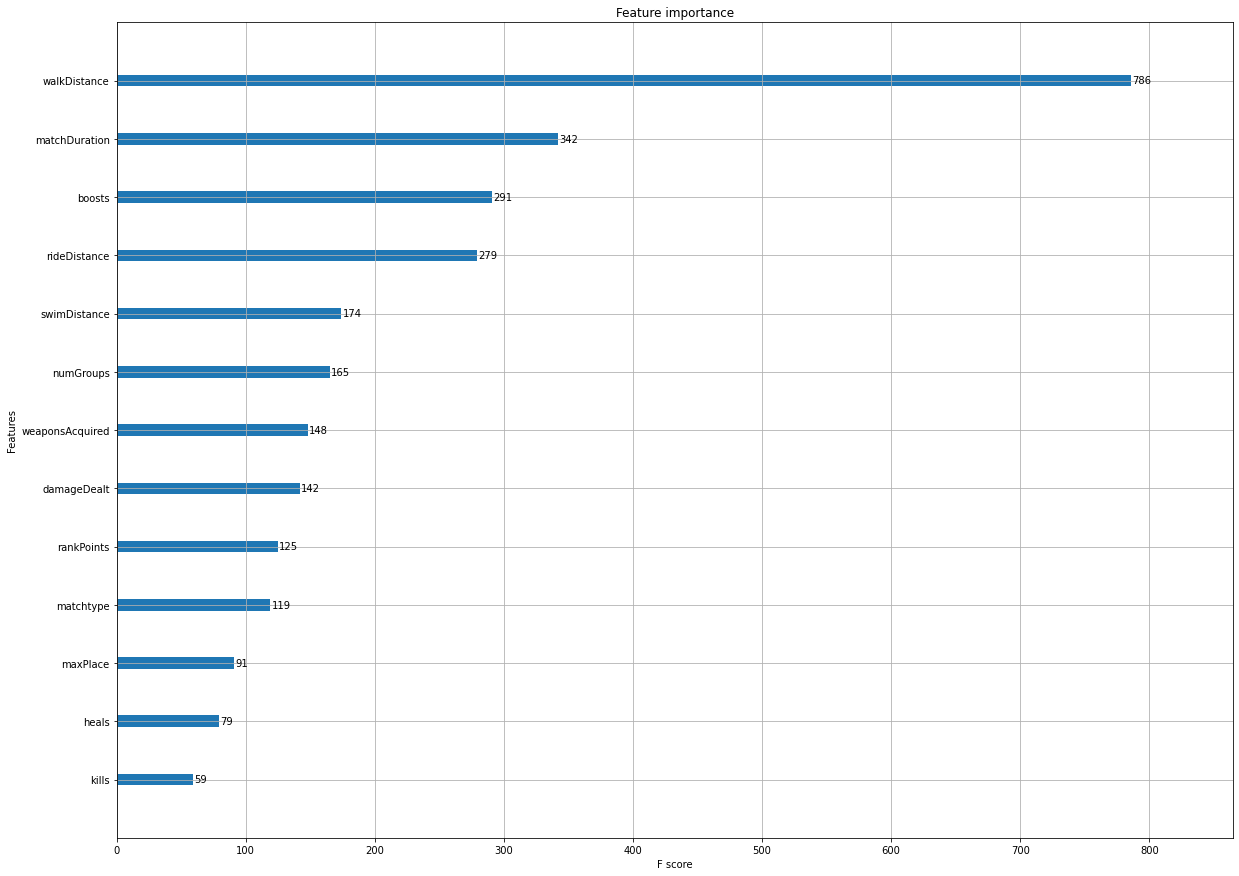

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
plot_importance(xgbr,ax=ax)#n_estimators=400

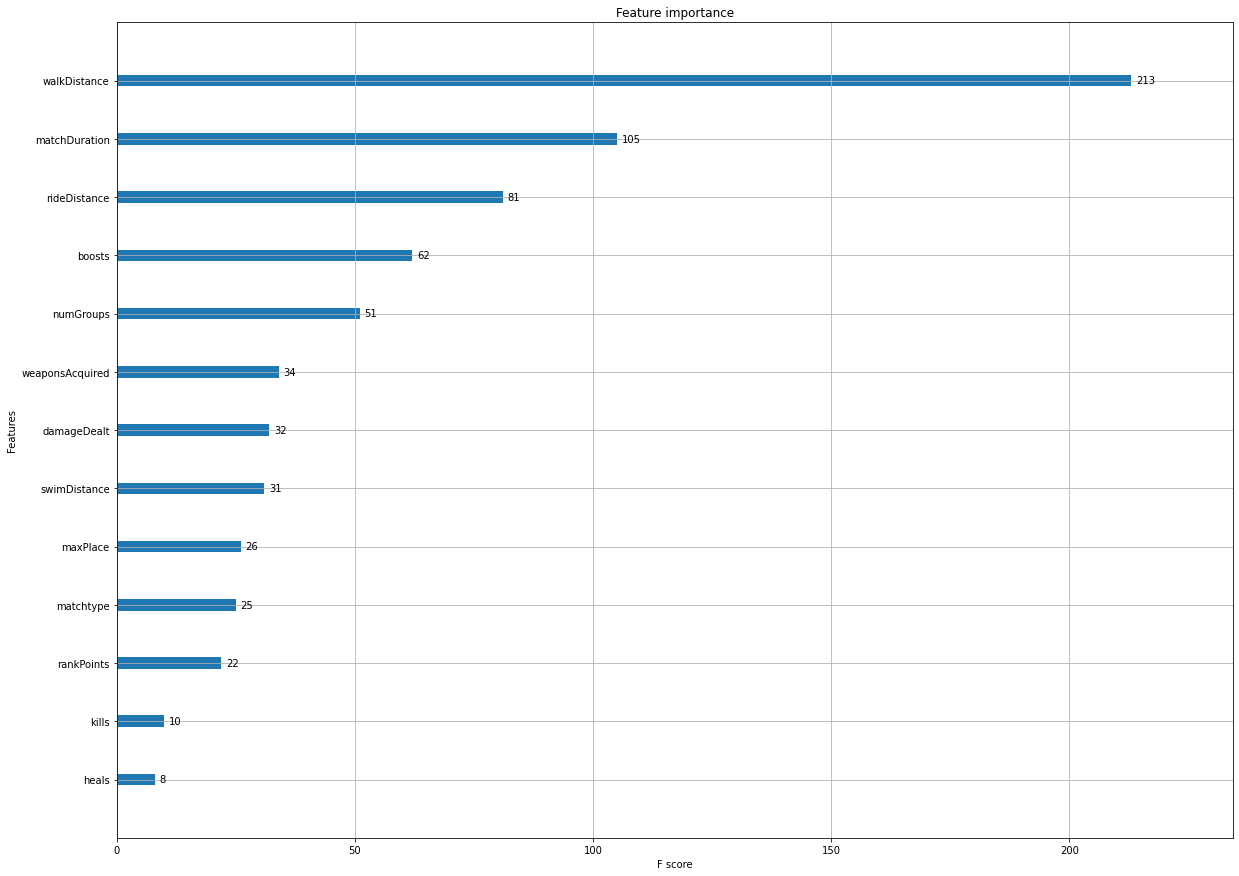

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
plot_importance(xgbr,ax=ax)#n_estimators=100

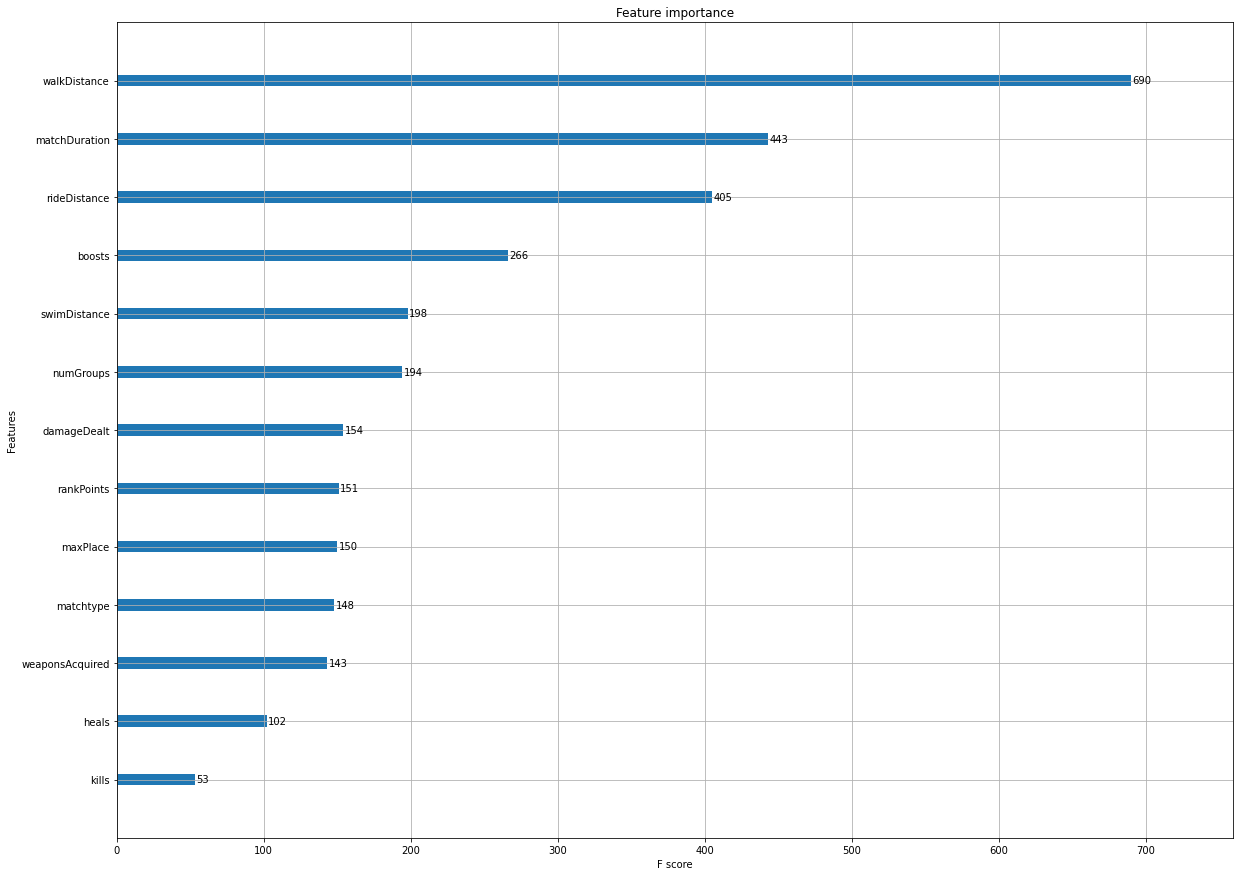

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
plot_importance(xgbr,ax=ax)#maxdepth

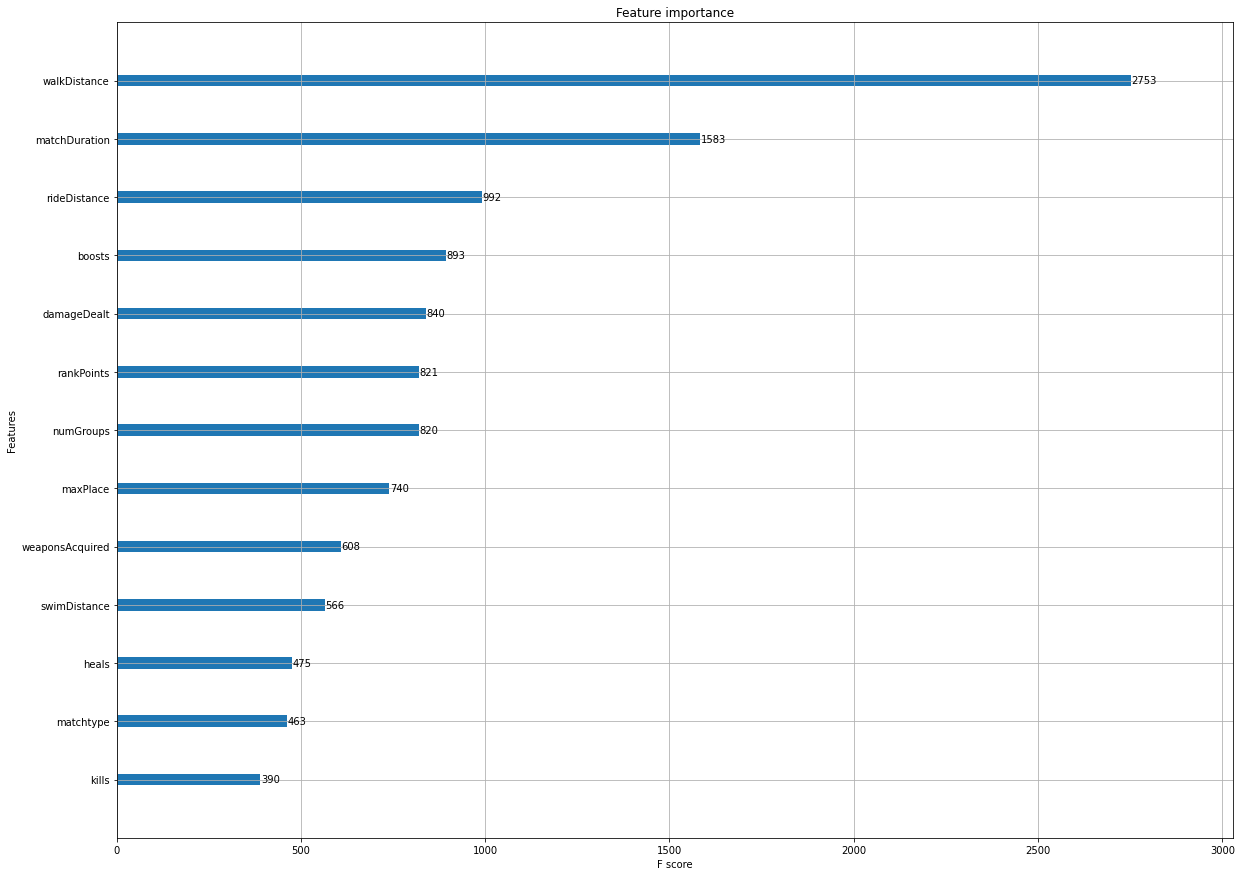

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
plot_importance(xgbr,ax=ax)


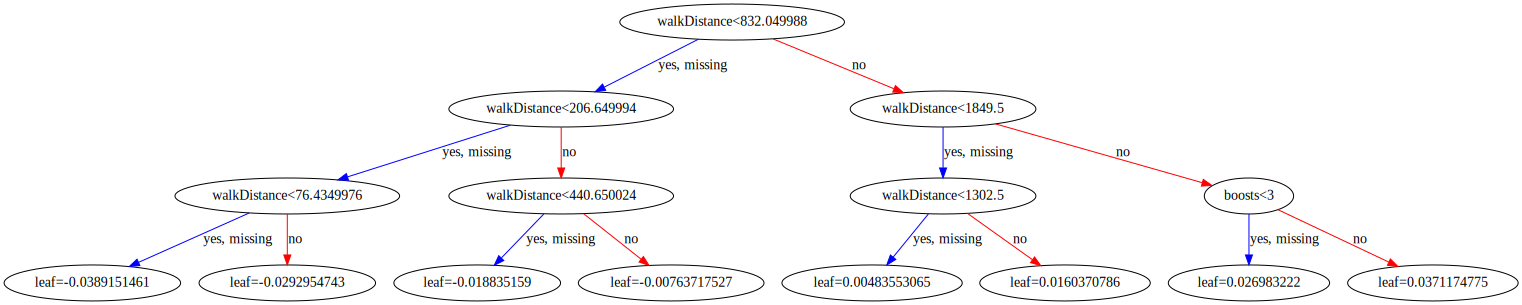

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

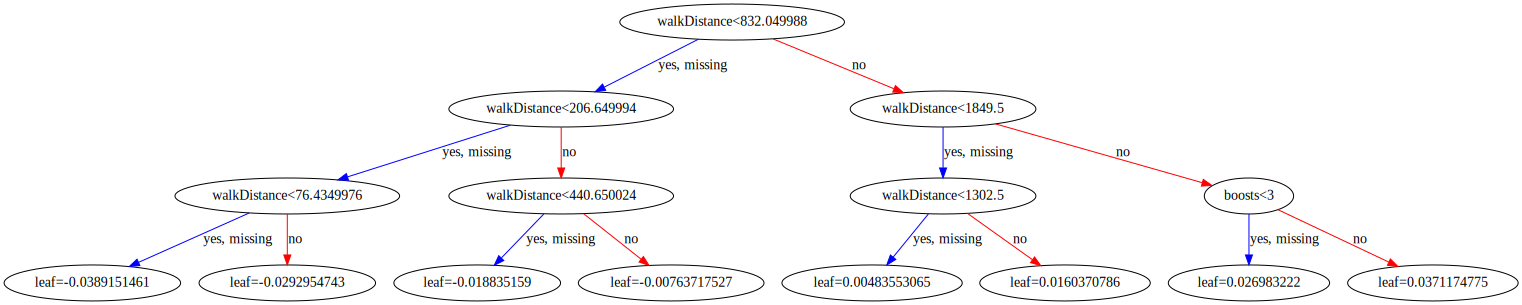

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

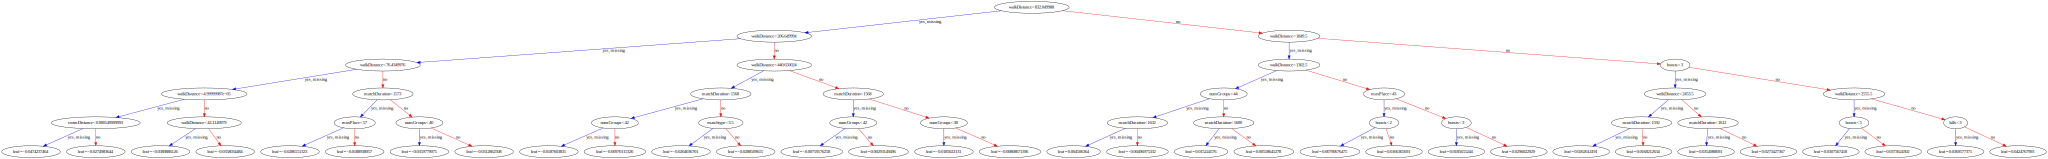

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

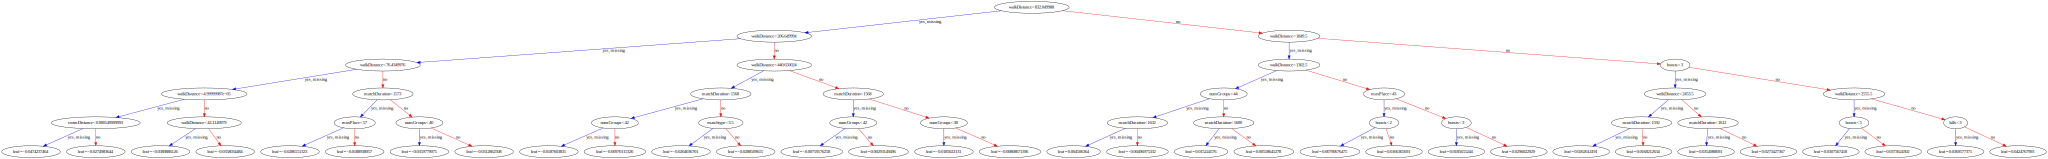

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph